# IPL Matches Data Analysis and Visualisation

#### In this project, I am going to analyse the data of IPL matches collected for three seasons. This is one of the datasets recommended in the course by joivan. I am trying to figure out several questions about the IPL matches like which team has won most matches in any season, what percentage of runs are scored from boundaries in a match on average, analyse how important is to win the toss in certain venues and many more... This is a part of the final project under the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com) which has really helped me to learn data visualisation from scratch.

## Downloading the Dataset

**TODO** - The data set can be downloaded from the url: https://www.kaggle.com/nowke9/ipldata/download 

In [1]:
!pip install jovian opendatasets --upgrade --quiet

In [2]:
project_name = "ipl-data-analysis-project" 

In [3]:
!pip install jovian --upgrade -q

In [4]:
import jovian

In [5]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tsandeepkumar-ug/ipl-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project


'https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project'

Let us import all the necessary libraries using their common aliasing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Data Preparation and Cleaning

###### The very first thing to do is to read the csv file into a pandas dataframe and then filter out the unwanted columns from the data,then add any useful columns and parsing the date column. After this, we can proceed with querying and answering, then visulaising using different plots.

In [2]:
ipl_df=pd.read_csv('matches.csv')

In [3]:
ipl_df

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,2019,Mumbai,05/05/19,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,2019,Chennai,07/05/19,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,2019,Visakhapatnam,10/05/19,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


In [4]:
ipl_df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

#### Let us remove all the unncessary columns from the dataframe.

In [5]:
ipl_df.drop(['umpire1','umpire2','umpire3','id','dl_applied'], inplace=True, axis=1)

#### Change the date object to pandas date time object

In [6]:
ipl_df['date']=pd.to_datetime(ipl_df.date)

#### We may required to check in each match , which innings has won the match, first or second. we add this column to the df.

In [7]:
ipl_df['batting_won']='First'

In [8]:
(rows,cols)=ipl_df.shape
for i in range(0,rows):
    if(ipl_df.at[i,'win_by_runs']==0):
        ipl_df.at[i,'batting_won']='Second'

#### We also require to see if the decision taken after winning the toss was successful or not

In [9]:
ipl_df['toss_success']=False

In [10]:
for i in range(0,rows):
    if((ipl_df.at[i,'toss_decision']=='bat' and ipl_df.at[i,'batting_won']=='First') or(ipl_df.at[i,'toss_decision']=='field' and ipl_df.at[i,'batting_won']=='Second')):
        ipl_df.at[i,'toss_success']=True;

In [11]:
ipl_df

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,batting_won,toss_success
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",First,False
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,Second,True
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Second,True
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,Second,True
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,First,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Second,True
752,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Second,False
753,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,Second,True
754,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Second,True


In [17]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           756 non-null    int64         
 1   city             749 non-null    object        
 2   date             756 non-null    datetime64[ns]
 3   team1            756 non-null    object        
 4   team2            756 non-null    object        
 5   toss_winner      756 non-null    object        
 6   toss_decision    756 non-null    object        
 7   result           756 non-null    object        
 8   winner           752 non-null    object        
 9   win_by_runs      756 non-null    int64         
 10  win_by_wickets   756 non-null    int64         
 11  player_of_match  752 non-null    object        
 12  venue            756 non-null    object        
 13  batting_won      756 non-null    object        
 14  toss_success     756 non-null    bool     

In [18]:
ipl_df.city.unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [19]:
ipl_df.result.unique()

array(['normal', 'tie', 'no result'], dtype=object)

In [20]:
ipl_df["winner"].fillna("No winner", inplace = True)
ipl_df["player_of_match"].fillna("not awarded", inplace = True)

In [21]:
ipl_df[ipl_df.city.isna()]

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,batting_won,toss_success
461,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Second,False
462,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Second,False
466,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,First,True
468,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,First,True
469,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,Second,False
474,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,Second,False
476,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,First,True


#### we fill all the null values in city column as 'unknown'

In [22]:
ipl_df["city"].fillna("unknown", inplace = True)

In [23]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   season           756 non-null    int64         
 1   city             756 non-null    object        
 2   date             756 non-null    datetime64[ns]
 3   team1            756 non-null    object        
 4   team2            756 non-null    object        
 5   toss_winner      756 non-null    object        
 6   toss_decision    756 non-null    object        
 7   result           756 non-null    object        
 8   winner           756 non-null    object        
 9   win_by_runs      756 non-null    int64         
 10  win_by_wickets   756 non-null    int64         
 11  player_of_match  756 non-null    object        
 12  venue            756 non-null    object        
 13  batting_won      756 non-null    object        
 14  toss_success     756 non-null    bool     

In [24]:
ipl_df

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,batting_won,toss_success
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",First,True
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,Second,False
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Second,False
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,Second,False
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,First,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Second,False
752,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Second,False
753,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,Second,False
754,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Second,False


In [25]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tsandeepkumar-ug/ipl-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project


'https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project'

#### Let us first read the file into a pandas dataframe. Then we need to process this raw data.

In [26]:
deliveries_raw_df=pd.read_csv('deliveries.csv')

In [27]:
deliveries_raw_df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

In [28]:
deliveries_raw_df.drop('is_super_over',axis=1,inplace=True)

**Filter the data including only first five matches**

In [29]:
deliveries_df=deliveries_raw_df[deliveries_raw_df.match_id<=5]

In [30]:
deliveries_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,5,2,Delhi Daredevils,Royal Challengers Bangalore,20,2,S Nadeem,A Mishra,P Negi,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1204,5,2,Delhi Daredevils,Royal Challengers Bangalore,20,3,S Nadeem,A Mishra,P Negi,0,0,0,0,0,0,0,0,S Nadeem,caught and bowled,NaN
1205,5,2,Delhi Daredevils,Royal Challengers Bangalore,20,4,A Mishra,Z Khan,P Negi,0,0,0,0,0,1,0,1,NaN,NaN,NaN
1206,5,2,Delhi Daredevils,Royal Challengers Bangalore,20,5,Z Khan,A Mishra,P Negi,0,0,0,0,0,1,0,1,NaN,NaN,NaN


In [31]:
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1208 entries, 0 to 1207
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   match_id          1208 non-null   int64 
 1   inning            1208 non-null   int64 
 2   batting_team      1208 non-null   object
 3   bowling_team      1208 non-null   object
 4   over              1208 non-null   int64 
 5   ball              1208 non-null   int64 
 6   batsman           1208 non-null   object
 7   non_striker       1208 non-null   object
 8   bowler            1208 non-null   object
 9   wide_runs         1208 non-null   int64 
 10  bye_runs          1208 non-null   int64 
 11  legbye_runs       1208 non-null   int64 
 12  noball_runs       1208 non-null   int64 
 13  penalty_runs      1208 non-null   int64 
 14  batsman_runs      1208 non-null   int64 
 15  extra_runs        1208 non-null   int64 
 16  total_runs        1208 non-null   int64 
 17  player_dismiss

#### We will now explore the number of teams played the tournament

In [32]:
deliveries_df.batting_team.unique()

array(['Sunrisers Hyderabad', 'Royal Challengers Bangalore',
       'Mumbai Indians', 'Rising Pune Supergiant', 'Gujarat Lions',
       'Kolkata Knight Riders', 'Kings XI Punjab', 'Delhi Daredevils'],
      dtype=object)

In [33]:
deliveries_df.describe()

,match_id,inning,over,ball,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.000000,1208.0,1208.000000,1208.000000,1208.000000
mean,3.000000,1.485927,10.227649,3.639073,0.043874,0.004139,0.009106,0.001656,0.0,1.384106,0.058775,1.442881
std,1.432838,0.500009,5.671218,1.823767,0.252042,0.118606,0.095029,0.040673,0.0,1.714931,0.294702,1.693121
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,2.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,3.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
75%,4.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,1.000000
max,5.000000,2.000000,20.000000,9.000000,5.000000,4.000000,1.000000,1.000000,0.0,6.000000,5.000000,6.000000


## Exploratory Analysis and Visualization

***We are now ready to process with our data. We can plot different types of graphs according to our requirement and can draw various conclusions based on the graphs obtained.***


### 1.In the first match, let us try to figure out the contribution of each batsman in the total score and visualise it by plotting a pie chart

In [34]:
match1_df=deliveries_df[deliveries_df['match_id']==1]

In [35]:
match1_innings1_df=match1_df[match1_df['inning']==1]

In [36]:
match1_innings1_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,2,DJ Hooda,BCJ Cutting,SR Watson,0,0,0,0,0,1,0,1,NaN,NaN,NaN
121,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,3,BCJ Cutting,DJ Hooda,SR Watson,0,0,0,0,0,6,0,6,NaN,NaN,NaN
122,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,4,BCJ Cutting,DJ Hooda,SR Watson,0,0,0,0,0,2,0,2,NaN,NaN,NaN
123,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,20,5,BCJ Cutting,DJ Hooda,SR Watson,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [37]:
match1_innings2_df=match1_df[match1_df['inning']==2]

In [38]:
match1_innings2_df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
125,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,Mandeep Singh,A Nehra,0,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,CH Gayle,A Nehra,0,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,19,6,YS Chahal,A Choudhary,B Kumar,0,0,0,0,0,1,0,1,NaN,NaN,NaN
244,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,1,YS Chahal,A Choudhary,BCJ Cutting,0,0,0,0,0,0,0,0,NaN,NaN,NaN
245,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,YS Chahal,A Choudhary,BCJ Cutting,0,0,0,0,0,1,0,1,NaN,NaN,NaN
246,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,A Choudhary,YS Chahal,BCJ Cutting,0,0,0,0,0,6,0,6,NaN,NaN,NaN


In [39]:
scorecard_df1=match1_innings1_df.groupby('batsman')['batsman_runs'].sum()
scorecard_df2=match1_innings2_df.groupby('batsman')['batsman_runs'].sum()

In [40]:
scorecard_df1.sort_values(ascending=False,inplace=True)

In [41]:
scorecard_df2.sort_values(ascending=False,inplace=True)

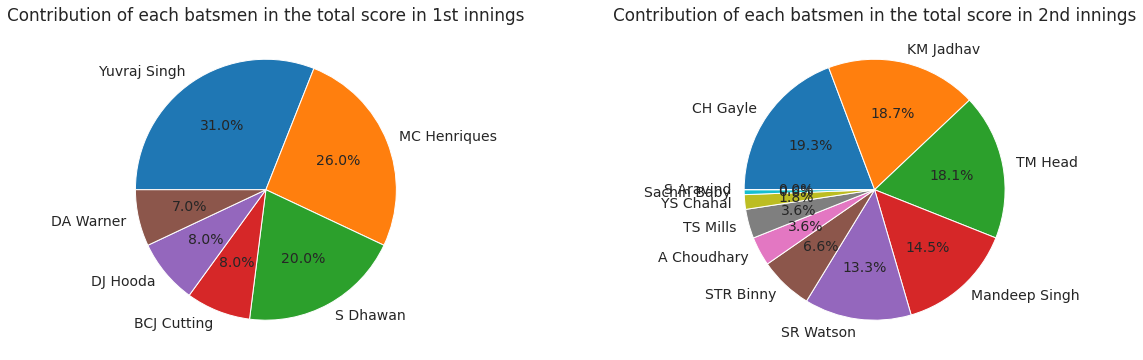

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

axes[0].set_title('Contribution of each batsmen in the total score in 1st innings')
axes[0].pie(scorecard_df1,labels=scorecard_df1.index, autopct='%1.1f%%', startangle=180,counterclock=False);

axes[1].set_title('Contribution of each batsmen in the total score in 2nd innings')
axes[1].pie(scorecard_df2,labels=scorecard_df2.index, autopct='%1.1f%%', startangle=180,counterclock=False);

***As we can observe, in the first innings there is almost 75% of contribution only from the threee batsman. And in the second innings there were around 5 batsman who made equal contributions to the total score.***

In [43]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tsandeepkumar-ug/ipl-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project


'https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project'

### Now, let us compare the total score of both the teams as the overs grow by plotting a line graph

In [44]:
overs_df_match1_innings1=match1_innings1_df[['over','total_runs']].groupby('over').sum()

In [45]:
overs_df_match1_innings1['score']=overs_df_match1_innings1['total_runs'].cumsum()

In [46]:
overs_df_match1_innings1

,total_runs,score
over,,
1,7,7
2,16,23
3,6,29
4,4,33
5,9,42
6,17,59
7,5,64
8,11,75
9,9,84


In [47]:
overs_df_match1_innings2=match1_innings2_df[['over','total_runs']].groupby('over').sum()

In [48]:
overs_df_match1_innings2['score']=overs_df_match1_innings2['total_runs'].cumsum()

In [49]:
overs_df_match1_innings2

,total_runs,score
over,,
1,11,11
2,1,12
3,16,28
4,15,43
5,5,48
6,6,54
7,7,61
8,13,74
9,11,85


In [50]:
overs_df_match1_innings1.index

Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20],
           dtype='int64', name='over')

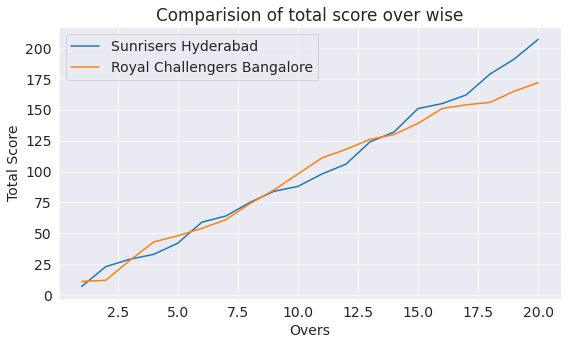

In [51]:
plt.plot(overs_df_match1_innings1.index,overs_df_match1_innings1.score)
plt.plot(overs_df_match1_innings1.index,overs_df_match1_innings2.score)
plt.xlabel('Overs')
plt.ylabel('Total Score')
plt.title('Comparision of total score over wise')
plt.legend(['Sunrisers Hyderabad','Royal Challengers Bangalore']);

***The graph depicts that both the teams have scored at the same pace till 16th over and therafter the Royal challengers Bangalore had not scored at the required pace.This is due to the wickets that have fallen in 16th over. Hence, they lost the match.***

### We shall now examine the runs scored in each over with the help of barchart and see where the Hyderabad team had gone past the Bangalore team.

In [52]:
matplotlib.rcParams['figure.figsize'] = (20,5)

Text(0.5, 1.0, 'Runs scored in each over')

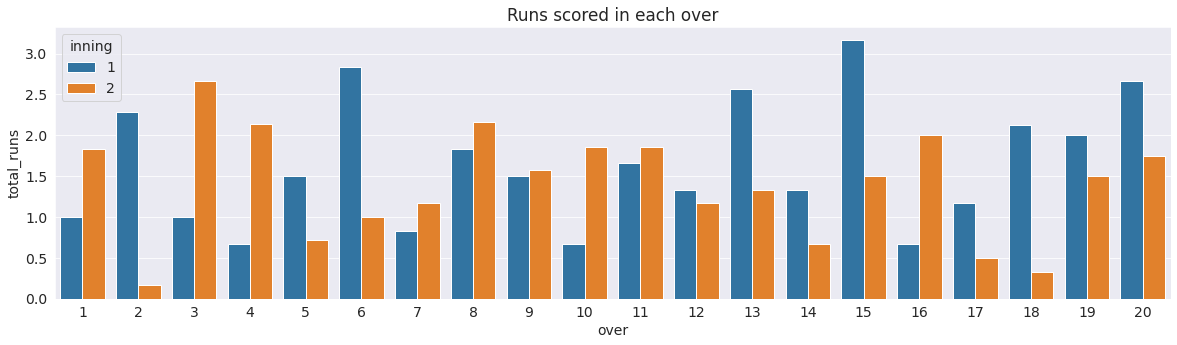

In [53]:
sns.barplot(x='over', y='total_runs', hue='inning', data=match1_df,ci=None);
plt.title('Runs scored in each over')

**The diffference had come in the 15th ,17th,18th,19th and the last overs where RCB was not able to score to the required extent.**

### 4. We are interested to see the variation of strike rate among different batsmen in t20's. Histogram is the one which suits the best for this purpose.

**We need to add the new column strike_rate in the df to plot the histogram.Lets do that.**

In [54]:
scorecard_df=deliveries_raw_df.groupby('batsman')['batsman_runs'].sum()

In [55]:
balls_df=deliveries_raw_df['batsman'].value_counts()

In [56]:
full_df = pd.concat([scorecard_df, balls_df],axis=1)

In [57]:
full_df.rename(columns={'batsman':'balls_faced','batsman_runs':'score'},inplace=True)

In [58]:
full_df['strike_rate']=full_df['score']/full_df['balls_faced']*100

In [59]:
full_df.sort_values('strike_rate',ascending=False,inplace=True)

In [60]:
full_df

,score,balls_faced,strike_rate
B Stanlake,5,2,250.000000
Umar Gul,39,19,205.263158
RS Sodhi,4,2,200.000000
S Sharma,8,4,200.000000
AD Russell,1445,803,179.950187
...,...,...,...
L Ablish,0,2,0.000000
Abdur Razzak,0,2,0.000000
V Pratap Singh,0,1,0.000000
ND Doshi,0,13,0.000000


In [61]:
matplotlib.rcParams['figure.figsize'] = (10,5)

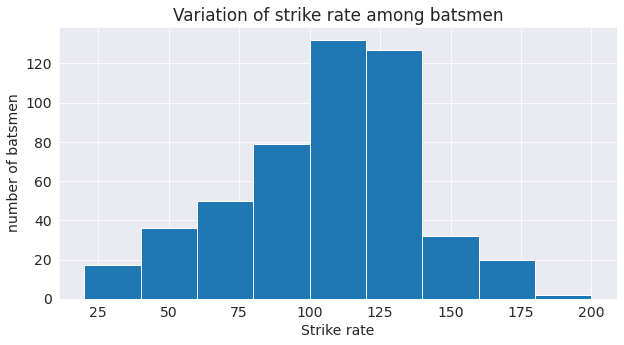

In [62]:
plt.hist(full_df.strike_rate, bins=np.arange(20,220,20))
plt.title('Variation of strike rate among batsmen')
plt.xlabel('Strike rate')
plt.ylabel('number of batsmen');

**The chart indicates that most of the batsman(more than 70%) have a strike rate around 100-150 which is obvious as the overs are less compared to the ODI's. And a very few batsman have around 75-100. Those who are having a strike rate below 50 must be bowlers since their primary purpose is not batting.**

In [63]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tsandeepkumar-ug/ipl-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project


'https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project'

### 5.One of the interesting questions is to figure out , what is the most frequent dismissal of a batsman? . well, we easily findout by a countplot. Lets do that.

In [64]:
deliveries_raw_df.dismissal_kind.unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

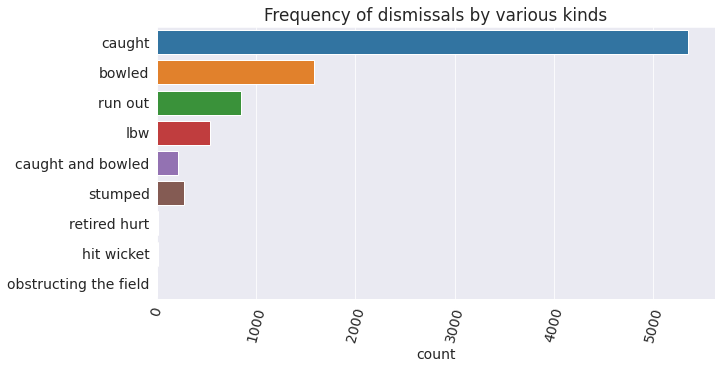

In [65]:
sns.countplot(y=deliveries_raw_df.dismissal_kind)
plt.xticks(rotation=75)
plt.title('Frequency of dismissals by various kinds')
plt.ylabel(None);

**It is really exciting to know that more than 60% of the dismissals are by catch out. The next frequent dismissal is bowled.  And about only 10% of the dismissals are by runout, even lesser are by lbw.**

Let us save and upload our work to Jovian before continuing

In [67]:
import jovian

In [68]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tsandeepkumar-ug/ipl-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project


'https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project'

## Asking and Answering Questions

**Lets now try to answer some exciting questons that arise in every cricket fan's mind.**


#### Q1:  Which team has won most number of matches in season 2017, 2018 and 2019 resepectively?

**To answer this question lets create seperate df's for each season and then using the winner column we can calculate the number of matches won by each team. Sorting these values can give us the requires team.**

In [69]:
ipl_df

,season,city,date,team1,team2,toss_winner,toss_decision,result,winner,win_by_runs,win_by_wickets,player_of_match,venue,batting_won,toss_success
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",First,True
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,Second,False
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Second,False
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,Second,False
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,First,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,2019,Mumbai,2019-05-05,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Second,False
752,2019,Chennai,2019-07-05,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Second,False
753,2019,Visakhapatnam,2019-08-05,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,Second,False
754,2019,Visakhapatnam,2019-10-05,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Second,False


In [70]:
season_2017_df=ipl_df[ipl_df['season']==2017]
season_2018_df=ipl_df[ipl_df['season']==2018]
season_2019_df=ipl_df[ipl_df['season']==2019]

In [71]:
season_17=season_2017_df.winner.value_counts()
season_18=season_2018_df.winner.value_counts()
season_19=season_2019_df.winner.value_counts()

In [72]:
season_17.sort_values(ascending=False)

Mumbai Indians                 12
Rising Pune Supergiant         10
Kolkata Knight Riders           9
Sunrisers Hyderabad             8
Kings XI Punjab                 7
Delhi Daredevils                6
Gujarat Lions                   4
Royal Challengers Bangalore     3
Name: winner, dtype: int64

In [73]:
season_18.sort_values(ascending=False)

Chennai Super Kings            11
Sunrisers Hyderabad            10
Kolkata Knight Riders           9
Rajasthan Royals                7
Mumbai Indians                  6
Kings XI Punjab                 6
Royal Challengers Bangalore     6
Delhi Daredevils                5
Name: winner, dtype: int64

In [74]:
season_19.sort_values(ascending=False)

Mumbai Indians                 11
Chennai Super Kings            10
Delhi Capitals                 10
Sunrisers Hyderabad             6
Kings XI Punjab                 6
Kolkata Knight Riders           6
Royal Challengers Bangalore     5
Rajasthan Royals                5
No winner                       1
Name: winner, dtype: int64

**From the series it is clear that, Mumbai Indians,Chennai Super Kings,Mumbai Indians are the teams that have won most number of matches in season 2017, 2018 and 2019 resepectively**

#### Q2: What percentage of matches are won by the team who bats first?

Just sum up all the matches in which batting_won is first and then we can easily calculate the percentage using total number of macthes played.

In [14]:
sum=ipl_df[ipl_df['batting_won']=='First'].count()

In [15]:
total_matches=ipl_df.count()['batting_won']
total_matches

756

In [16]:
percentage=sum['batting_won']/total_matches*100

In [17]:
percentage

44.576719576719576

**As we can see only about 44.5 % of macthes are won the team batting first and the rest are by the team batting second.**

#### Q3: In how many matches winning the toss played an important role? i.e. the decision taken by the team winning toss turn out to be useful (they won the match)?

In [18]:
succesful_matches=ipl_df['toss_success'].sum()
succesful_matches

396

In [19]:
required_percentage_of_matches=succesful_matches/total_matches*100

In [20]:
required_percentage_of_matches

52.38095238095239

**As we can observe only 52.38% of the matches are won by taking the correct decision after winning the toss. It implies that winning the toss doesnt have much impact on winning the match until you are strong enough to beat the opposition.**

#### Q4: What percentage of the total runs are being scored by hitting the boundaries ? (consider all the matches)

***Boundaries include both 4's as well as 6's. So we need to sum up all the values where batsman_runs== 4 or 6 and take the fraction with the total runs scored.***

In [82]:
filtered_df1=deliveries_df[deliveries_df['batsman_runs']==4]
filtered_df2=deliveries_df[deliveries_df['batsman_runs']==6]
boundary_runs=filtered_df1['batsman_runs'].sum()+filtered_df2['batsman_runs'].sum()

In [83]:
boundary_runs

1040

In [84]:
total_runs=deliveries_df.total_runs.sum()

In [85]:
ans=boundary_runs/total_runs*100

In [86]:
ans

59.66724039013196

**The answer is quite obvious and as expected ina T20 match. Most of the batsman prefer to score by hitting boundaries rather than trying to take singles and doubles.**

#### Q5: Which span of overs are important for the batting team? Which overs are the ones in which most of the runs are conceded?

***We can plot a bar chart to visualise the overs against runs conceded and then we can easily draw the conclusions for the question.***

In [87]:
over_df=deliveries_df.groupby('over')['total_runs'].sum()

In [88]:
over_df=over_df/10 #calculated for 10 innings, so divide by ten to get the average runs.

In [89]:
over_df

over
1      7.8
2      8.9
3      9.3
4      9.1
5      7.2
6     11.0
7      7.7
8      8.1
9      6.5
10     8.8
11     8.7
12     7.3
13    12.0
14     9.6
15    10.8
16     8.8
17     6.1
18     7.6
19     8.2
20    10.8
Name: total_runs, dtype: float64

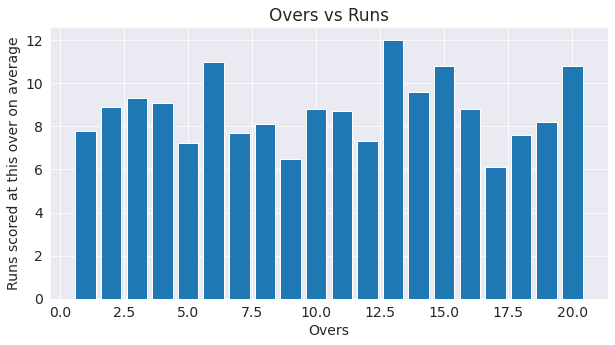

In [90]:
plt.bar(over_df.index,over_df)
plt.title('Overs vs Runs')
plt.xlabel('Overs')
plt.ylabel('Runs scored at this over on average');

**The bar chart clearly describes the runs scored in each over on an average considering all the matches. We can observe that in the span of overs 1 to 6, the runs scored are high and the runrate is around 9. This is because of the field restrictions applied due to the powerplay where the batsman get the chance to clear the 30 yard circle easily and hit the boundaries. We can also observe that at the end of the powerplay i.e. in the 6th over the runrate was around 11 which is very high since the batsman tries to make the maximum benefit of the field restrictions.**

***In the middle overs(7-12), there is a slight decrease in the runrate as the field restrictions are now relaxed and the batsman tries to stand in the crease rather than hitting more runs. Once the batsman has faced enough number of balls, he tries to take charge on the bowlers at 13th or 14th over. Thus, ther is a considerable increase in the runrate here. Another possible reason for this is the discussion during the strategic timeout in 14th or 15th overs. ***

***During the last 4 overs(16-20), if the batting team has wickets in hand, they will try to score the maximum runs as the overs are getting finished, so the runrate goes upto 11 in the final over.***

Let us save and upload our work to Jovian before continuing.

In [91]:
import jovian

In [100]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tsandeepkumar-ug/ipl-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project


'https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project'

## Inferences and Conclusion

**Based on all the above analysis, its now time to list out all the conclusions that we have drawn out from the graphs and calculations.**

1. The powerplay overs are very much crucial for scoring more runs for any team.
2. Winning the toss doesnot have significant impact over winning the match.
3. Most of the batsmen have a strike rate of around 100-150 in t20I's
4. The most frequent dismissal is catch out in T20I's
5. The final 4 overs are the most scoring overs in IPL history.

In [93]:
import jovian

In [98]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tsandeepkumar-ug/ipl-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project


'https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project'

## References and Future Work

**It was great experiece and very much interesting to analyse my favourite tournament IPL data. I thank Jovian for providing me this oppurtunity. My future plannings are to analyse the trends of stock market. We may find many interting data sets on kaggle website.**

In [95]:
import jovian

In [99]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "tsandeepkumar-ug/ipl-data-analysis-project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project


'https://jovian.ai/tsandeepkumar-ug/ipl-data-analysis-project'